1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [187]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de para implementar modelos de ciencia de datos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

In [189]:
# lectura de datos en Python y carga en data
data = pd.read_csv('C:/Users/sachi/Downloads/CAR_DETAILS_FROM_CAR_DEKHO.csv')

In [191]:
# Lectura de datos para analisis exploratorio
data.head(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [193]:
# Descripción de los datos
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [195]:
# Revisamos valores nulos
print("Valores nulos:\n", data.isnull().sum())

Valores nulos:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [198]:
# Calcular año actual automáticamente
current_year = datetime.now().year
data['car_age'] = current_year - data['year']

# Eliminar columnas innecesarias
data.drop(['year', 'name'], axis=1, inplace=True)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos year')

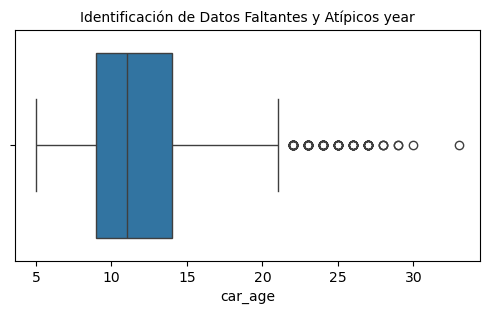

In [202]:
# Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['car_age'])
plt.title('Identificación de Datos Faltantes y Atípicos year', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos selling_price')

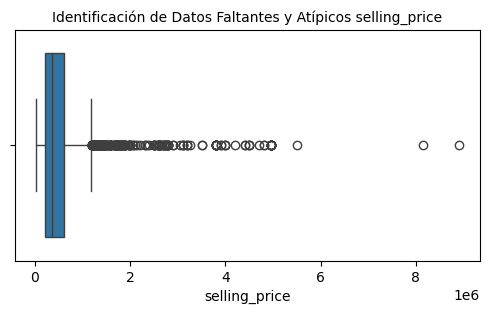

In [204]:
# Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['selling_price'])
plt.title('Identificación de Datos Faltantes y Atípicos selling_price', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos km_driven')

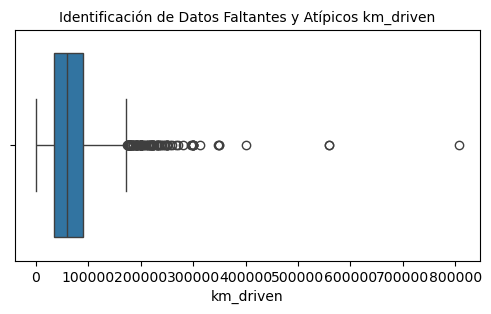

In [206]:
# Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['km_driven'])
plt.title('Identificación de Datos Faltantes y Atípicos km_driven', fontsize=10 )

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [211]:
# Caracteristica de interes: 
# Para este caso se definen variables independientes e independiente con el fin de predecir el precio del automóvil en función de sus atributos
# Entrenar el modelo de regresión
X = data.drop("selling_price", axis=1)
Y = data["selling_price"]

In [213]:
# Identificamos columnas categóricas y numéricas
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [215]:
# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [218]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [220]:
print (X_train)

      km_driven    fuel seller_type transmission         owner  car_age
227       20000  Diesel  Individual       Manual   First Owner        8
964       50000  Diesel  Individual       Manual   First Owner        7
2045      25000  Petrol  Individual       Manual  Second Owner       12
1025      70000  Diesel  Individual       Manual   First Owner       14
4242      72000  Diesel      Dealer       Manual   First Owner        8
...         ...     ...         ...          ...           ...      ...
3444      50000  Diesel  Individual       Manual   First Owner       19
466       80000  Diesel  Individual       Manual   First Owner       14
3092      51000  Diesel      Dealer       Manual   First Owner        9
3772      80000  Diesel  Individual       Manual   First Owner       12
860       80000  Petrol  Individual       Manual   First Owner       12

[3472 rows x 6 columns]


In [222]:
print (X_test)

      km_driven    fuel       seller_type transmission         owner  car_age
3978      80000  Diesel        Individual       Manual   First Owner       15
1448      27000  Petrol        Individual       Manual   First Owner        6
2664      41723  Petrol        Individual       Manual  Second Owner       17
17       141000  Diesel        Individual       Manual  Second Owner       11
1634      60000  Diesel        Individual    Automatic  Second Owner        9
...         ...     ...               ...          ...           ...      ...
3468      60000  Petrol        Individual       Manual   Third Owner       18
3164     120000  Diesel        Individual       Manual   First Owner       10
416       40000  Diesel        Individual       Manual  Second Owner       14
1616       6480  Petrol  Trustmark Dealer       Manual   First Owner        8
2480      30000  Petrol            Dealer       Manual   First Owner        6

[868 rows x 6 columns]


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [237]:
# Construir el modelo de regresión logística 
model = Pipeline(steps=[("preprocessor", preprocessor),("regressor", LinearRegression())])
model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['km_driven', 'car_age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('regressor', LinearRegression())])

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [240]:
# Evaluar el modelo
Y_pred = model.predict(X_test)

In [242]:
print("R² score:", r2_score(Y_test, Y_pred))


R² score: 0.4031303601432117


In [244]:
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))

RMSE: 426786.6899872593


7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

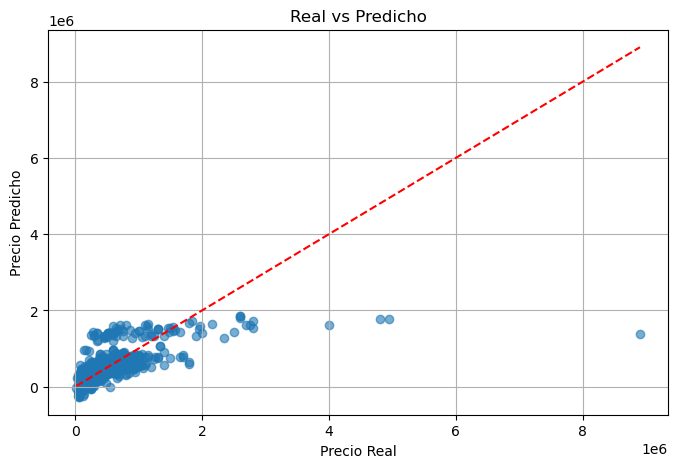

In [247]:
# Comparación real vs predicho
plt.figure(figsize=(8,5))
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')  # línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Real vs Predicho")
plt.grid(True)
plt.show()

Interpretacion de los resultados

La gráfica muestra que el modelo de regresión lineal predice razonablemente bien los precios de autos comunes (entre 0 y 2 millones), pero subestima considerablemente el precio de autos más caros, especialmente a partir de los 3 millones